## **This code will store basic image processing methods that will be use by other code.**

First we need to mount our code with google drive.

In [1]:
# To mount code with google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Import all the package that we will use for the code.

In [0]:
# Import the necessary packages
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

Our translate method takes three parameters: the image we are going to translate, the number of pixels that we are going to shift along the x-axis, and the number of pixels we are going to shift along the y-axis.

This method then deﬁnes our translation matrix M on Line 3 and then applies the actual shift on Line 4. Finally, we return the shifted image on Line 7.

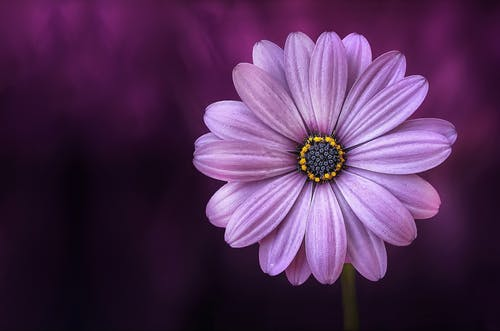

In [8]:
args = {
	# Task 2
	"image": '/content/drive/My Drive/Colab Notebooks/Image-Processing/corona.png',
  "image2": '/content/drive/My Drive/Colab Notebooks/Image-Processing/flower.jpg'
}
image = cv2.imread(args['image2'])
cv2_imshow(image)

[[  1.   0. 130.]
 [  0.   1. 150.]]


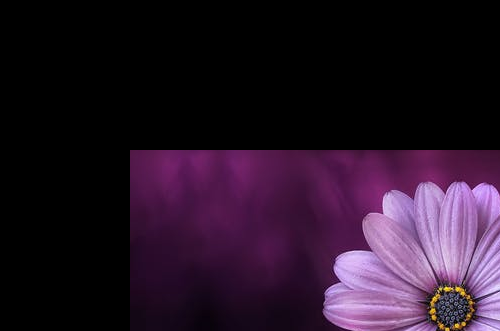

In [18]:
def translate(image, x, y):
	# Define the translation matrix and perform the translation
	M = np.float32([[1, 0, x], [0, 1, y]])
	shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
	print(M)
	# Return the translated image
	return shifted
cv2_imshow(translate(image, 130, 150))

Our rotatemethod takes four arguments. The ﬁrst is our image. The second is the angle θ in which we want to rotate the image. We provide two optional keyword arguments, center and scale. The center parameter is the point which we wish to rotate our image around. If a value of None is provided, the method automatically determines the center of the image on Lines 7-8. Finally, the scale parameter is used to handle if the size of the image should be changed during the rotation. The scale parameter has a default value of 1.0, implying that no resizing should be done.

The actual rotation of the image takes place on Lines 11 and 12, where we construct our rotation matrix M and ap- ply it to the image. Finally, our image is returned on Line 15.

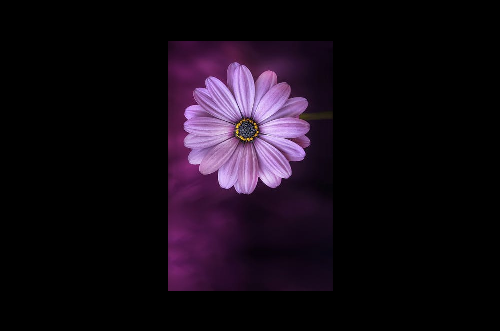

In [27]:
def rotate(image, angle, center = None, scale = 1.0):
	# Grab the dimensions of the image
	(h, w) = image.shape[:2]

	# If the center is None, initialize it as the center of
	# the image
	if center is None:
		center = (w // 2, h // 2)

	# Perform the rotation
	M = cv2.getRotationMatrix2D(center, angle, scale)
	rotated = cv2.warpAffine(image, M, (w, h))

	# Return the rotated image
	return rotated

cv2_imshow(rotate(image, 90,scale =0.5))

The ﬁrst argument is the image we want to resize. Then, we deﬁne two keyword arguments, width and height. Both of these arguments cannot be None, otherwise we won’t know how to resize the image. We also provide inter, which is our interpolation method and defaults to cv2.INTER_AREA.

On Lines 4 and 5, we deﬁne the dimensions of our new, resized image and grab the dimensions of the original image.

We perform a quick check on Lines 9-10 to ensure that a numerical value has been provided for either the width or the height.

The computation of the ratio and new, resized image dimensions are handled on Lines 13-24, depending on whether we are resizing via width or via height.

Line 27 handles the actual resizing of the image, then Line 30 returns our resized image to the user.

In [0]:
def resize(image, width = None, height = None, inter = cv2.INTER_AREA):
	# initialize the dimensions of the image to be resized and
	# grab the image size
	dim = None
	(h, w) = image.shape[:2]

	# if both the width and height are None, then return the
	# original image
	if width is None and height is None:
		return image

	# check to see if the width is None
	if width is None:
		# calculate the ratio of the height and construct the
		# dimensions
		r = height / float(h)
		dim = (int(w * r), height)

	# otherwise, the height is None
	else:
		# calculate the ratio of the width and construct the
		# dimensions
		r = width / float(w)
		dim = (width, int(h * r))

	# resize the image
	resized = cv2.resize(image, dim, interpolation = inter)

	# return the resized image
	return resized